In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [9]:
import sys
import os
sys.path.append(os.path.abspath('../src')) 

In [12]:
!pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/ee/11/83ae52318353f9da4a88cc23e7f9dbc3d449b3f0fd6158fba15eb3c3b816/plotly-6.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for narwhals>=1.15.1 from https://files.pythonhosted.org/packages/2c/e6/4d16dfa26f40230593c216bf695da01682fdbdf6af4e79abef572ab26bce/narwhals-1.40.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB 262.6 kB/s eta 0:01:02
   ---------------------------------------- 0.0/16.1 MB 262.6 kB/s eta 0:01:02
   ---------------------------------------- 0.1/16.1 MB 297.7 kB/s eta 0:00:54
   ---------------------------------------- 0.1/16.1 MB 374.1 kB/s eta 0:00:43
   ---------------------------------------- 0.1/16.1 MB 374.1 kB/s 


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import sys
import os

# Add the src folder to sys.path if not already
sys.path.append(os.path.abspath('../src'))

from eda_utils import summary_and_missing

In [18]:
from eda_utils import (
   summary_and_missing)

In [19]:
import pandas as pd

sierraleone_df = pd.read_csv('data/sierraleone-bumbuna.csv') 
sierraleone_df['Timestamp'] = pd.to_datetime(sierraleone_df['Timestamp'])
sierraleone_df.set_index('Timestamp', inplace=True)


FileNotFoundError: [Errno 2] No such file or directory: 'data/sierraleone-bumbuna.csv'

In [3]:
print(sierraleone_df.head())

                     GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

                     WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  \
Timestamp                                                                   
2021-10-30 00:01:00      0.0  0.0      0.0  1002         0            0.0   
2021-10-30 00:02:00      0.0  0.0      0.0  1002         0            0.0   
2021-10-30 00:03:00      0.0  0.0      0.0  1002         0            0.0   
2021-10-30 00:04:00      0.0  0.0      0.0  1002         0            0.1   
2021-10-30 0

In [4]:
# Summary stats for numeric columns
print(sierraleone_df.describe())

# Missing value count per column
missing = sierraleone_df.isna().sum()
print(missing)

# List columns with >5% nulls
total_rows = len(sierraleone_df)
cols_with_nulls = missing[missing > 0.05 * total_rows]
print("Columns with >5% missing values:\n", cols_with_nulls)


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [7]:
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(sierraleone_df[cols_to_check].apply(zscore))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")

# Option: remove outliers
cleaned_df = sierraleone_df[~outliers]

# Impute missing values with median
for col in cols_to_check:
    cleaned_df[col].fillna(cleaned_df[col].median(), inplace=True)

# Save cleaned data
cleaned_df.to_csv('data/sierraleone_clean.csv')


Number of outliers: 16292


C:\Users\selam\AppData\Local\Temp\ipykernel_1156\1379193234.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df[col].fillna(cleaned_df[col].median(), inplace=True)
C:\Users\selam\AppData\Local\Temp\ipykernel_1156\1379193234.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[col].fillna(cleaned_df[col].median(), inplace

<Figure size 1200x600 with 0 Axes>

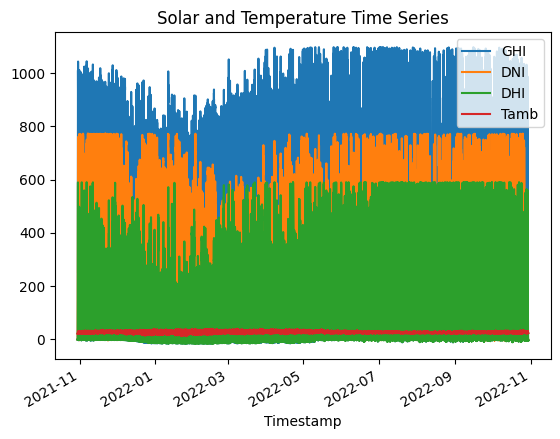

In [8]:
plt.figure(figsize=(12, 6))
cleaned_df[['GHI', 'DNI', 'DHI', 'Tamb']].plot()
plt.title('Solar and Temperature Time Series')
plt.show()

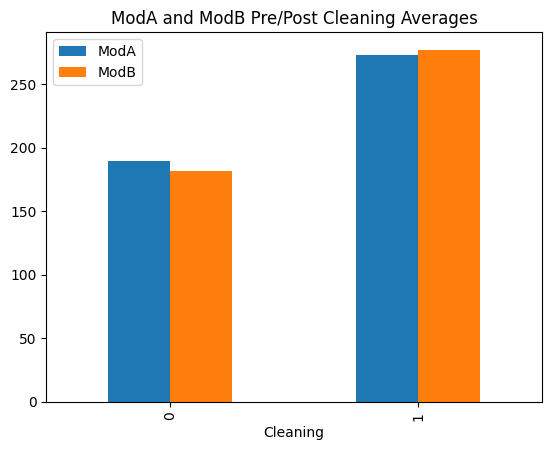

In [9]:
cleaned_df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('ModA and ModB Pre/Post Cleaning Averages')
plt.show()

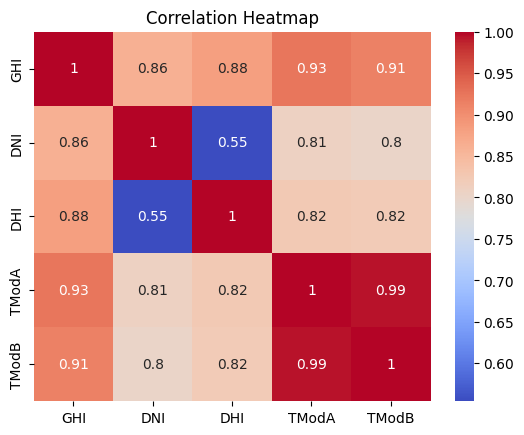

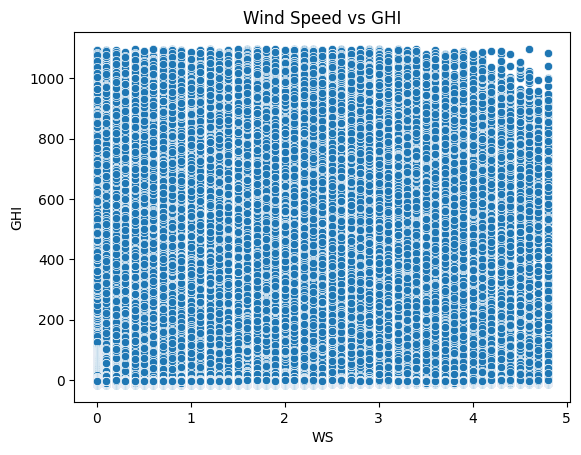

In [10]:
corr = cleaned_df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots example
sns.scatterplot(x='WS', y='GHI', data=cleaned_df)
plt.title('Wind Speed vs GHI')
plt.show()


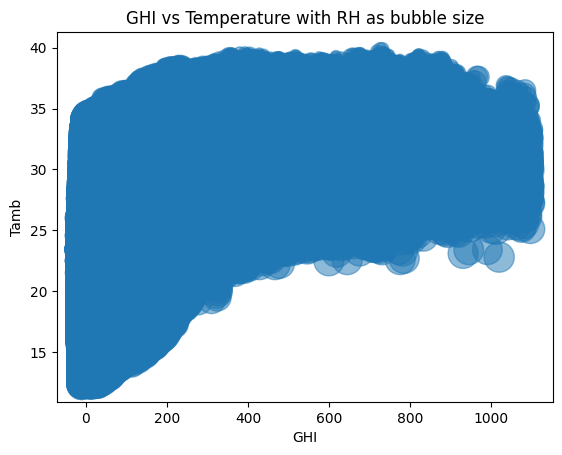

In [11]:
plt.scatter(cleaned_df['GHI'], cleaned_df['Tamb'], s=cleaned_df['RH']*5, alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Temperature with RH as bubble size')
plt.show()
